In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

df=pd.read_csv('IM_DA_TK_ALL.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df[(df['DATE'] >= '2022-11-01')&(df['DATE'] <= '2023-01-31')]


,DATE,IM_TK,DA_TK,DA_SYSTEM_PRICE,DA_TOTAL_VOLUME,DA_BUY_VOLUME,DA_SELL_VOLUME,PRECIPITATION,RADIATION,WIND_DIRECTION,WIND_SPEED,TEMPERATURE,GAS_USD,USD_JPY,GAS_JPY,TTS,TTB,TTM
0,2022-11-01 00:00:00,26.04,28.01,19.68,16085100,17531500,18189050,0.0,0.0,292.5,2.2,13.0,27.540,148.77,4097.0,149.77,147.77,148.77
1,2022-11-01 00:30:00,26.25,28.00,19.41,16050150,17907350,19453000,0.0,0.0,292.5,2.2,13.0,27.540,148.77,4097.0,149.77,147.77,148.77
2,2022-11-01 01:00:00,20.91,27.69,19.20,16013500,18151200,20249600,0.0,0.0,315.0,2.3,12.8,27.540,148.77,4097.0,149.77,147.77,148.77
3,2022-11-01 01:30:00,46.67,27.01,19.20,16013850,18287700,20478250,0.0,0.0,315.0,2.3,12.8,27.540,148.77,4097.0,149.77,147.77,148.77
4,2022-11-01 02:00:00,21.41,24.64,19.21,16017600,18416450,20585050,0.0,0.0,292.5,2.2,12.2,27.540,148.77,4097.0,149.77,147.77,148.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,2023-01-30 22:00:00,24.96,22.66,21.56,21389050,24932850,23643850,0.0,0.0,315.0,3.5,3.3,19.485,130.11,2535.0,131.11,129.11,130.11
4365,2023-01-30 22:30:00,22.50,17.90,17.69,21460750,24118200,24383300,0.0,0.0,315.0,3.5,3.3,19.485,130.11,2535.0,131.11,129.11,130.11
4366,2023-01-30 23:00:00,20.61,17.61,17.29,21367700,23556350,24225000,0.0,0.0,315.0,4.9,3.3,19.485,130.11,2535.0,131.11,129.11,130.11
4367,2023-01-30 23:30:00,17.87,16.99,16.99,20907850,22662000,24153550,0.0,0.0,315.0,4.9,3.3,19.485,130.11,2535.0,131.11,129.11,130.11


In [3]:
df.drop(['IM_TK',"DA_SYSTEM_PRICE"],axis=1,inplace=True)

In [4]:
df

,DATE,DA_TK,DA_TOTAL_VOLUME,DA_BUY_VOLUME,DA_SELL_VOLUME,PRECIPITATION,RADIATION,WIND_DIRECTION,WIND_SPEED,TEMPERATURE,GAS_USD,USD_JPY,GAS_JPY,TTS,TTB,TTM
0,2022-11-01 00:00:00,28.01,16085100,17531500,18189050,0.0,0.0,292.5,2.2,13.0,27.540,148.77,4097.0,149.77,147.77,148.77
1,2022-11-01 00:30:00,28.00,16050150,17907350,19453000,0.0,0.0,292.5,2.2,13.0,27.540,148.77,4097.0,149.77,147.77,148.77
2,2022-11-01 01:00:00,27.69,16013500,18151200,20249600,0.0,0.0,315.0,2.3,12.8,27.540,148.77,4097.0,149.77,147.77,148.77
3,2022-11-01 01:30:00,27.01,16013850,18287700,20478250,0.0,0.0,315.0,2.3,12.8,27.540,148.77,4097.0,149.77,147.77,148.77
4,2022-11-01 02:00:00,24.64,16017600,18416450,20585050,0.0,0.0,292.5,2.2,12.2,27.540,148.77,4097.0,149.77,147.77,148.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16199,2023-10-04 11:30:00,13.73,15566250,20210950,21074150,0.0,0.0,180.0,3.2,25.9,14.395,149.58,2153.0,150.58,148.58,149.58
16200,2023-10-04 12:00:00,13.47,15413800,19119000,21341300,0.0,0.0,180.0,3.2,25.9,14.395,149.58,2153.0,150.58,148.58,149.58
16201,2023-10-04 12:30:00,13.28,15328200,18877300,21196450,0.0,0.0,180.0,3.2,25.9,14.395,149.58,2153.0,150.58,148.58,149.58
16202,2023-10-04 13:00:00,13.67,15135750,18682650,20952650,0.0,0.0,180.0,3.2,25.9,14.395,149.58,2153.0,150.58,148.58,149.58


In [5]:
# Ensure DATETIME is in datetime format and sort the data
df['DATE'] = pd.to_datetime(df['DATE'])
df.sort_values('DATE', inplace=True)

In [6]:
# We focus only on the  for the LSTM model
prices = df['DA_TK'].values.reshape(-1, 1)

In [7]:
NP = (prices- prices.min()) / (prices.max() - prices.min())
# NP = prices

In [23]:
def create_sequences(df, sequence_length):
    xs, ys = [], []
    for i in range(len(df) - sequence_length):
        x = df[i:(i + sequence_length)]
        y = df[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


sequence_length = 96 

In [24]:
# Create sequences
x, y = create_sequences(NP, sequence_length)

In [ ]:
len(X)

16108

In [ ]:
len(y)

16108

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[[0.19683937],
        [0.19683937],
        [0.19003801],
        ...,
        [0.25105021],
        [0.23724745],
        [0.24544909]],

       [[0.21864373],
        [0.21844369],
        [0.21224245],
        ...,
        [0.28905781],
        [0.27965593],
        [0.26565313]],

       [[0.45989198],
        [0.42688538],
        [0.35007001],
        ...,
        [0.43708742],
        [0.45069014],
        [0.4594919 ]],

       ...,

       [[0.56311262],
        [0.54970994],
        [0.54310862],
        ...,
        [0.52070414],
        [0.45869174],
        [0.45329066]],

       [[0.22824565],
        [0.22824565],
        [0.22624525],
        ...,
        [0.24004801],
        [0.23924785],
        [0.24204841]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.21004201],
        [0.19163833],
        [0.09981996]]])

In [ ]:
y_test

array([[0.55011002],
       [0.30726145],
       [0.19243849],
       ...,
       [0.67693539],
       [0.29365873],
       [0.46209242]])

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12886, 96, 1), (3222, 96, 1), (12886, 1), (3222, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the LSTM model
model = Sequential()                    
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
# Due to resource limitations, we will limit the number of epochs and batch size
history = model.fit(X_train, y_train, batch_size=64, epochs=500, validation_data=(X_test, y_test))
# history.save('testmodel.h5')
    
# Summarize the model's architecture
model.summary()

Epoch 1/500
202/202 [==============================] - 18s 69ms/step - loss: 0.0086 - val_loss: 0.0044
Epoch 2/500
202/202 [==============================] - 11s 56ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 3/500
202/202 [==============================] - 11s 55ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 4/500
202/202 [==============================] - 12s 58ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 5/500
202/202 [==============================] - 10s 50ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 6/500
202/202 [==============================] - 11s 54ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/500
202/202 [==============================] - 10s 49ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/500
202/202 [==============================] - 10s 49ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/500
202/202 [==============================] - 15s 75ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/500
202/202 [==============================] - 11s 55ms/step - l

In [ ]:
model.save('testTokyo.h5')

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


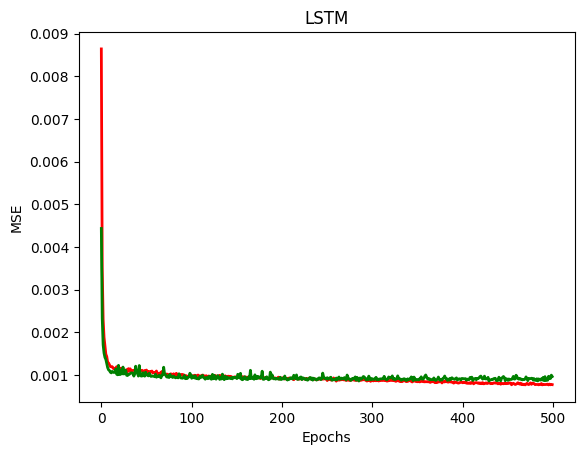

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Train loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [ ]:
predicted_prices = model(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(predicted_prices, y_test)
MSE

NameError: name 'predicted_prices' is not defined

In [ ]:
from sklearn.metrics import r2_score
R2=r2_score(predicted_prices, y_test)
R2

0.951090316136861

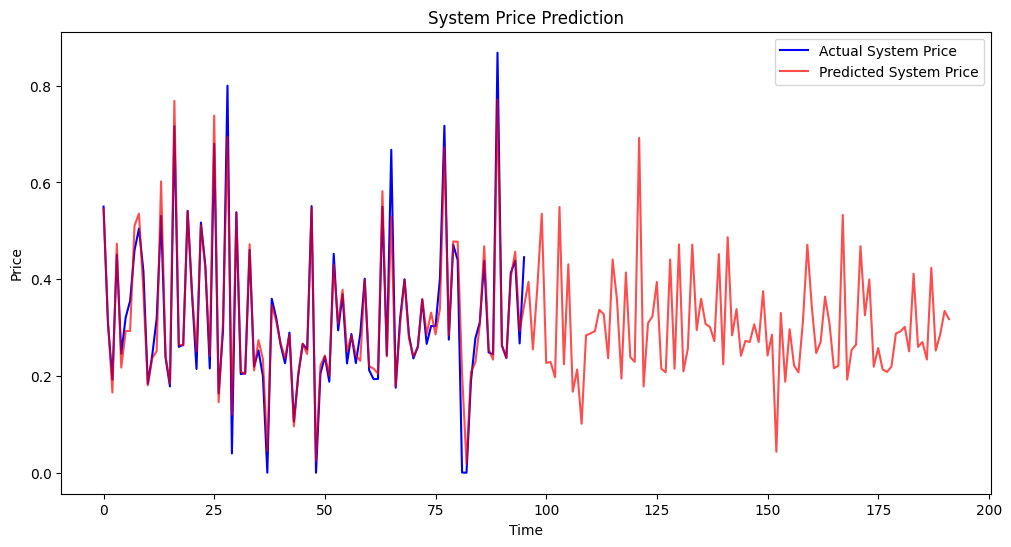

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual and predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test[:96], color='blue', label='Actual System Price')
plt.plot(predicted_prices[:192], color='red', alpha=0.7, label='Predicted System Price')
plt.title('System Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()